In [1]:
import matplotlib.pyplot as plt
import numpy as np

 Para este ejercicio usaremos los datos [Temixco_2018_patched_corrected_may2019_V1p0.csv] disponibles en https://github.com/AltamarMx/curso_Python/tree/main/data. Son los mismos datos que usamos en la última tarea.

## 1. Importa las columnas de temperatura, humedad y radiacion para los primeros 7 días


In [2]:
file = open("./data/Temixco_2018_patched_corrected_may2019_V1p0.csv")
lines = file.readlines()
file.close()

leer = []
for x in lines:
    leer.append(x.rstrip("\n").split(",")[3])

In [9]:
#lines
#leer

In [10]:
temp = []
for x in leer[1:]:
    temp.append(float(x))

In [14]:
lines

['time,Ib,Ig,To,RH,WS,WD,P\n',
 '2018-01-01 00:00:00,,,18.7,36.34,1.422,316.0,87864.11\n',
 '2018-01-01 00:10:00,0.002,0.0,18.95,35.29,1.008,283.7,87876.37\n',
 '2018-01-01 00:20:00,0.17,0.0,18.94,35.43,1.565,326.0,87888.64\n',
 '2018-01-01 00:30:00,0.371,0.0,18.77,35.89,2.175,354.5,87887.21\n',
 '2018-01-01 00:40:00,0.305,0.0,18.81,36.34,1.902,348.0,87886.90999999999\n',
 '2018-01-01 00:50:00,0.031,0.0,19.23,35.4,1.468,6.668,87889.36\n',
 '2018-01-01 01:00:00,0.034,0.0,19.23,35.67,1.368,11.67,87894.78\n',
 '2018-01-01 01:10:00,0.178,0.0,19.25,35.6,1.122,3.498,87899.54\n',
 '2018-01-01 01:20:00,0.001,0.0,19.21,35.97,0.332,64.51,87896.81999999999\n',
 '2018-01-01 01:30:00,0.0,0.0,18.32,42.31,1.428,132.2,87893.40999999999\n',
 '2018-01-01 01:40:00,0.0,0.0,17.82,44.35,0.643,66.8,87898.19\n',
 '2018-01-01 01:50:00,0.0,0.0,17.82,43.65,1.49,25.0,87892.06000000001\n',
 '2018-01-01 02:00:00,0.0,0.0,18.03,41.42,1.673,12.17,87884.6\n',
 '2018-01-01 02:10:00,0.077,0.0,18.24,40.37,1.988,357.7,8788

In [26]:
temp      = [float(x.rstrip("\n").split(",")[3]) for x in lines[1:24*6*7]] #24*6*7 equivalente a datos de 7 días
humedad   = [float(x.rstrip("\n").split(",")[4]) for x in lines[1:24*6*7]]
radiacion = [(x.rstrip("\n").split(",")[2]) for x in lines[1:24*6*7]]

In [27]:
radiacion[0] = np.nan

In [28]:
radiacion = np.asfarray(radiacion)

In [29]:
radiacion

array([nan,  0.,  0., ...,  0.,  0.,  0.])

## 2. Grafica los datos de temperatura vs humedad

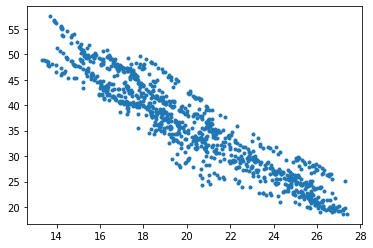

In [31]:
plt.plot(temp, humedad, '.')

### 2.1 Realiza un ajuste de regresión lineal por mínimos cuadrados y graficalo con el conjunto de datos

https://www.amherst.edu/system/files/media/1287/SLR_Leastsquares.pdf

$$\hat{Y}=\mu Y \mid X=\beta_{0}+\beta_{1} X$$

$$
\hat{\beta}_{1}=\frac{\sum_{i=1}^{n}\left(X_{i}-\bar{X}\right)\left(Y_{i}-\bar{Y}\right)}{\sum_{i=1}^{n}\left(X_{i}-\bar{X}\right)^{2}}
$$

$$
\hat{\beta}_{0}=\bar{Y}-\hat{\beta}_{1} \bar{X}
$$

In [32]:
x = np.asarray(temp)
y = np.asarray(humedad)

In [36]:
x_mean = np.mean(x)
y_mean = np.mean(y)

b_1 = np.sum((x-x_mean)*(y-y_mean))/np.sum((x-x_mean)**2)
b_0 = y_mean-b_1*x_mean

eje_x = np.arange(np.min(temp), np.max(temp))
eje_x

array([13.33, 14.33, 15.33, 16.33, 17.33, 18.33, 19.33, 20.33, 21.33,
       22.33, 23.33, 24.33, 25.33, 26.33, 27.33])

In [38]:
np.linspace(np.min(temp), np.max(temp))

array([13.33      , 13.61632653, 13.90265306, 14.18897959, 14.47530612,
       14.76163265, 15.04795918, 15.33428571, 15.62061224, 15.90693878,
       16.19326531, 16.47959184, 16.76591837, 17.0522449 , 17.33857143,
       17.62489796, 17.91122449, 18.19755102, 18.48387755, 18.77020408,
       19.05653061, 19.34285714, 19.62918367, 19.9155102 , 20.20183673,
       20.48816327, 20.7744898 , 21.06081633, 21.34714286, 21.63346939,
       21.91979592, 22.20612245, 22.49244898, 22.77877551, 23.06510204,
       23.35142857, 23.6377551 , 23.92408163, 24.21040816, 24.49673469,
       24.78306122, 25.06938776, 25.35571429, 25.64204082, 25.92836735,
       26.21469388, 26.50102041, 26.78734694, 27.07367347, 27.36      ])

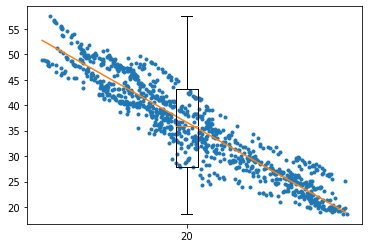

In [44]:
plt.plot(temp, humedad,'.')
plt.plot(eje_x, b_0 + b_1*eje_x)
plt.boxplot(humedad, positions=[20], widths=1);

## 3. Grafica los boxplots para el conjunto de datos de humedad que se relacione con las temperaturas usando algún intervalo adecuado

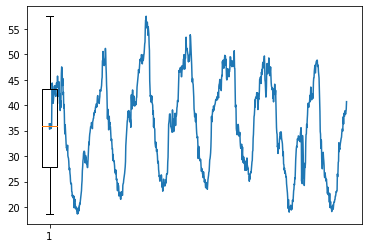

In [48]:
plt.plot(humedad)
plt.boxplot(humedad, widths=50);

In [41]:
# Q3 + 1.5* RI
# Q3
# Q2 = mediana
# Q1
# Q1 - 1.5*RI

In [64]:
hum1 = []
hum2 = []
hum3 = []
hum4 = []
hum5 = []
hum6 = []
hum7 = []
for i in range(len(temp)):
    if temp[i] < 16:
        hum1.append(humedad[i])
    if temp[i] >= 16 and temp[i] < 18:
        hum2.append(humedad[i])
    if temp[i] >= 18 and temp[i] < 20:
        hum3.append(humedad[i])
    if temp[i] >= 20 and temp[i] < 22:
        hum4.append(humedad[i])
    if temp[i] >= 22 and temp[i] < 24:
        hum5.append(humedad[i])
    if temp[i] >= 24 and temp[i] < 26:
        hum6.append(humedad[i])
    if temp[i] >= 26:
        hum7.append(humedad[i])

hums = [hum1,hum2,hum3,hum4,hum5,hum6,hum7]

In [65]:
np.arange(15,28,2)

array([15, 17, 19, 21, 23, 25, 27])

(12.0, 29.0)

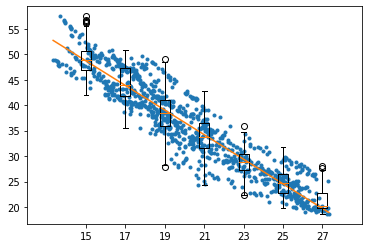

In [68]:
plt.plot(temp, humedad,'.')
plt.plot(eje_x, b_0 + b_1*eje_x)
plt.boxplot(hums, positions=np.arange(15,28,2), widths=0.5);
# plt.boxplot(hum2, positions=[17], widths=0.5);
# plt.boxplot(hum3, positions=[19], widths=0.5);
plt.xlim(12,29)